# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Exploring and Preparing Data


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


### Import Libraries and Define Auxiliary Functions


In [1]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis


Read the SpaceX dataset into a Pandas dataframe


In [3]:
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp = await fetch(URL)
dataset_part_2_csv = io.BytesIO((await resp.arrayBuffer()).to_py())
df=pd.read_csv(dataset_part_2_csv)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


See how the `FlightNumber` and `Payload` variables would affect the launch outcome.

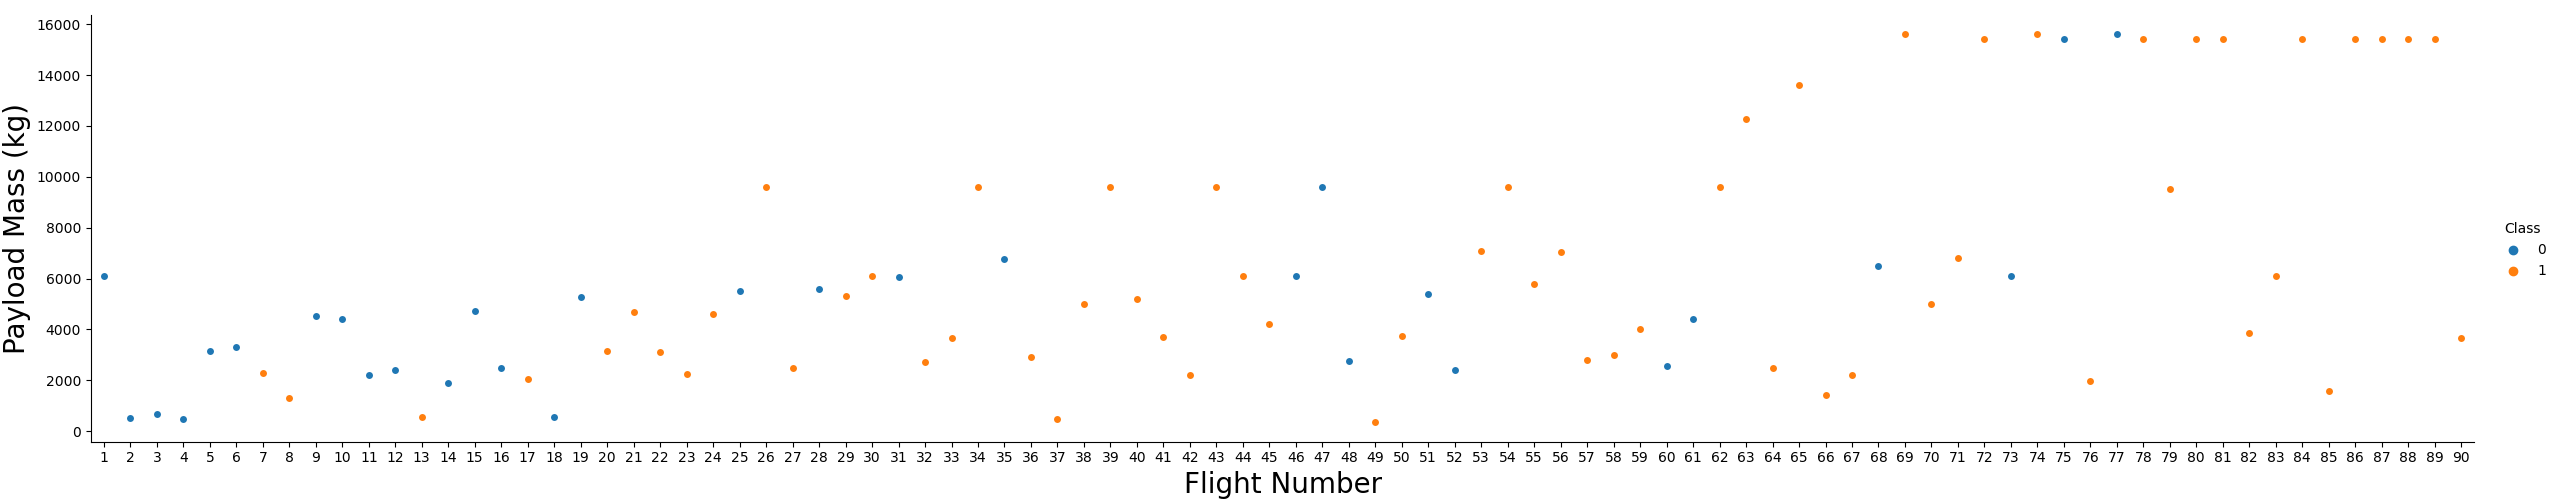

In [4]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Payload Mass (kg)",fontsize=20)
plt.show()

#### Visualize the relationship between Flight Number and Launch Site


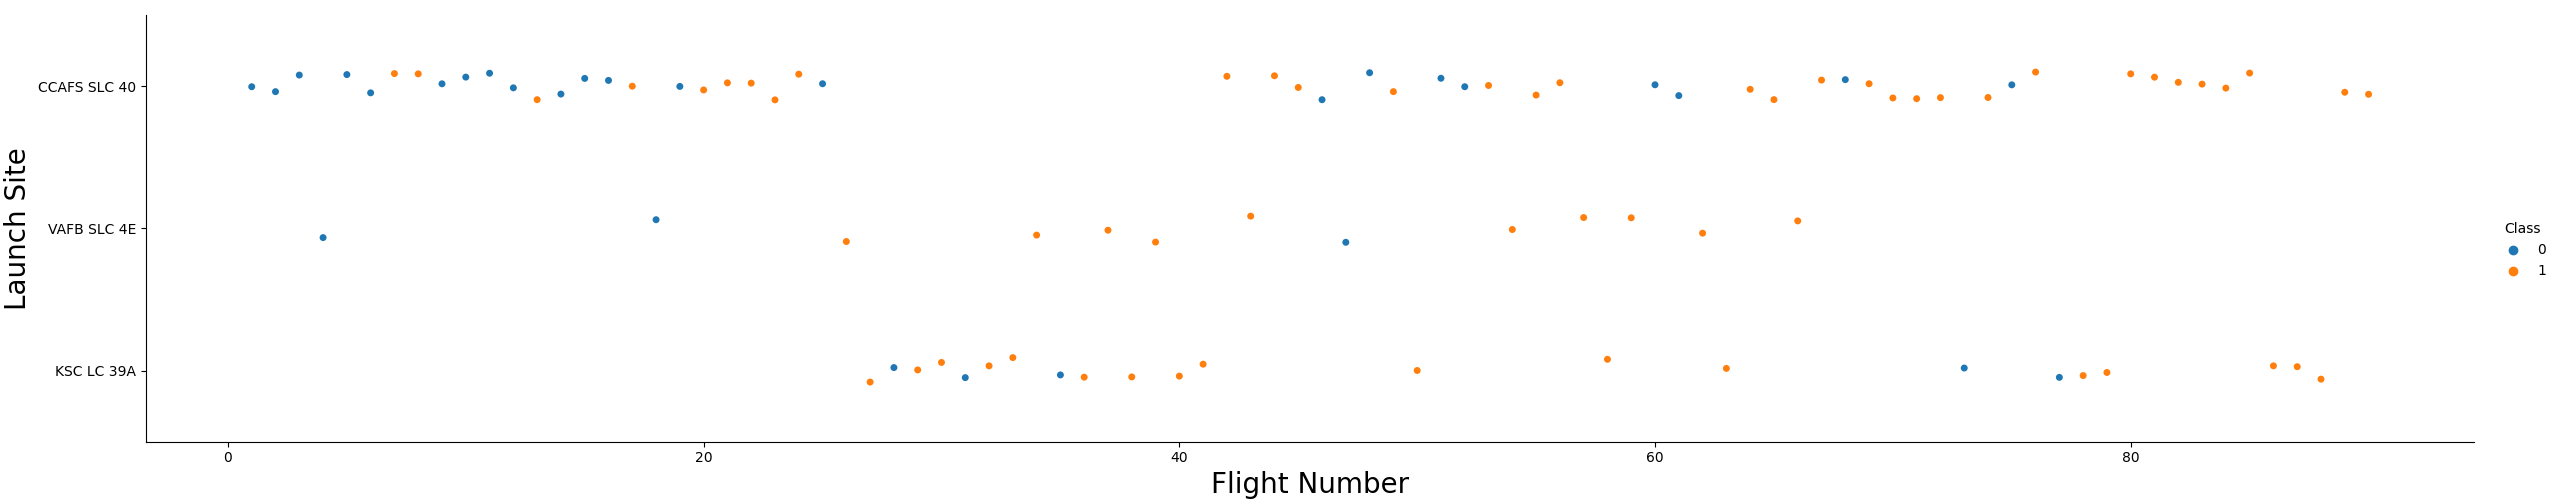

In [5]:
sns.catplot(x="FlightNumber", y="LaunchSite", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

*CCAFS SLC 40 had the most flights, but the lowest rate of successful landings.
KSC LC 39A had more flights and a similar success rate to VAFB SLC 4E.*

### Visualize the relationship between Payload and Launch Site


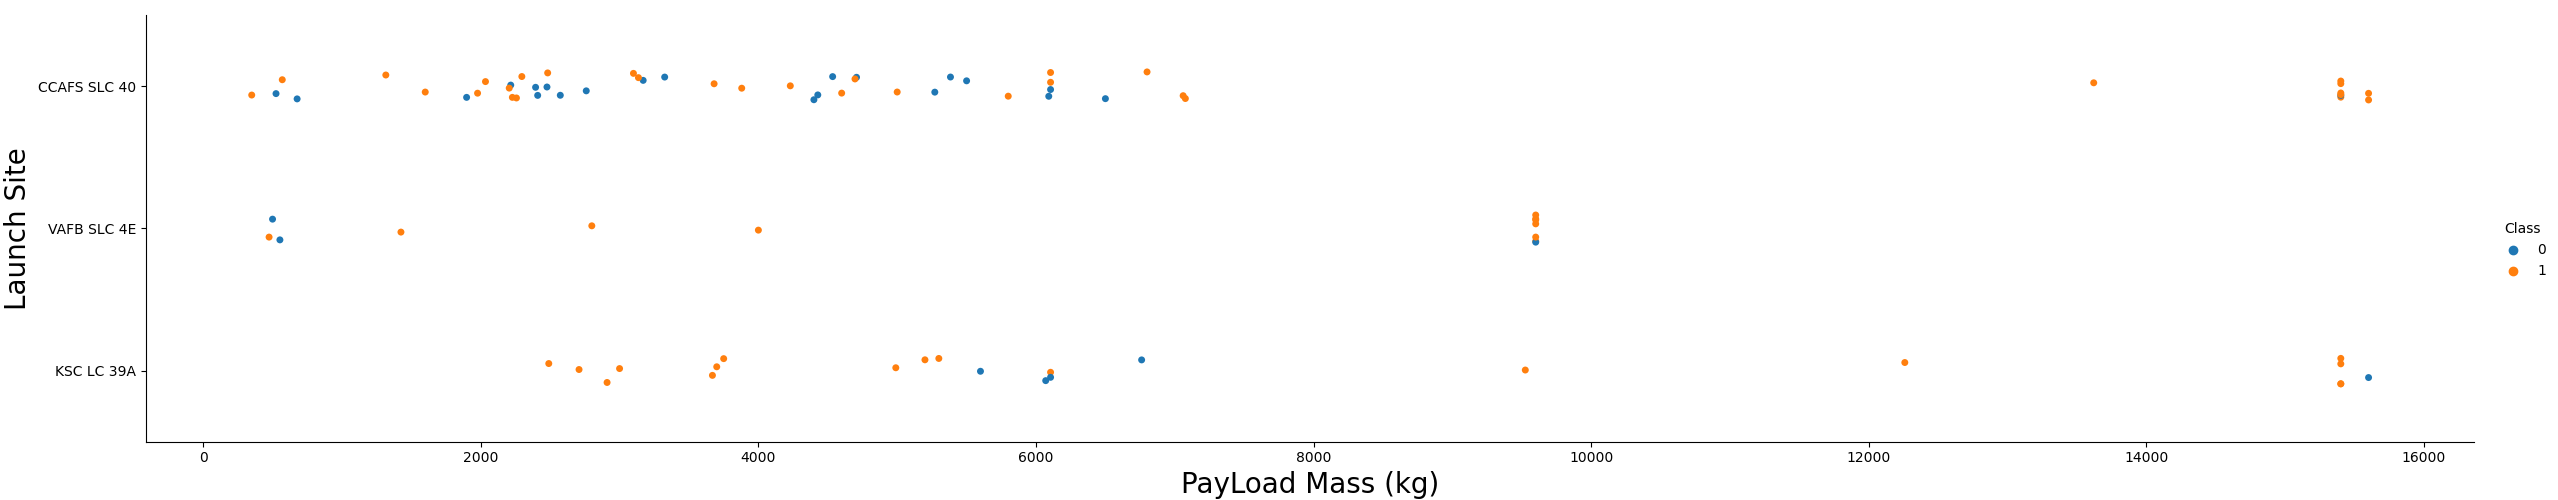

In [6]:
sns.catplot(x="PayloadMass", y="LaunchSite", hue="Class", data=df, aspect = 5)
plt.xlabel("PayLoad Mass (kg)",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

***VAFB SLC 4E launch site has no launches with a payload mass >1000kg***

### Visualize the relationship between success rate of each orbit type


In [7]:
df_orbit = df.groupby(['Orbit'])['Class'].mean().reset_index()
df_orbit


,Orbit,Class
0,ES-L1,1.000000
1,GEO,1.000000
2,GTO,0.518519
3,HEO,1.000000
4,ISS,0.619048
5,LEO,0.714286
6,MEO,0.666667
7,PO,0.666667
8,SO,0.000000
9,SSO,1.000000


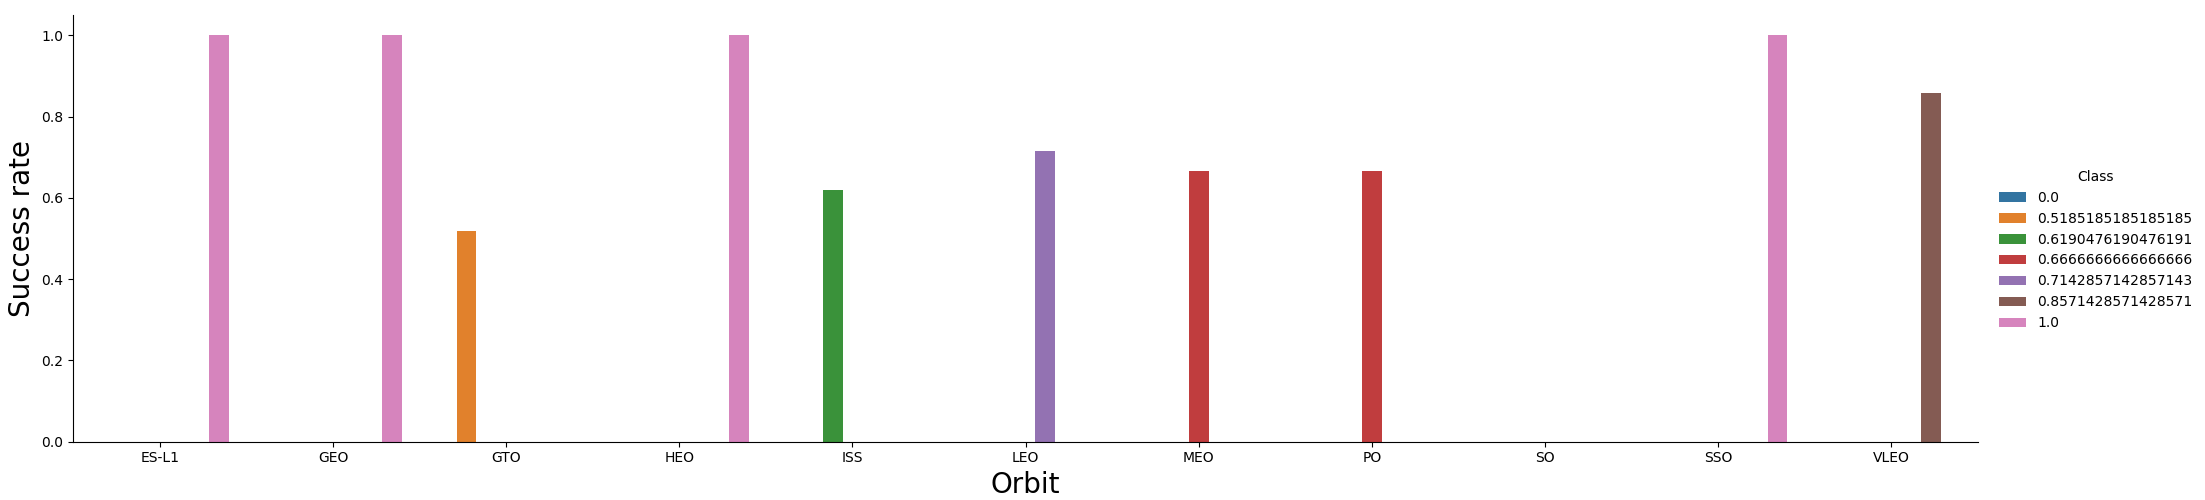

In [8]:
sns.catplot(x="Orbit", y="Class", hue="Class", data=df_orbit, kind="bar", aspect = 4)
plt.xlabel("Orbit",fontsize=20)
plt.ylabel("Success rate",fontsize=20)
plt.show()

*ES-L1, GEO, HEO, and SSO have high success rates*


### Visualize the relationship between FlightNumber and Orbit type


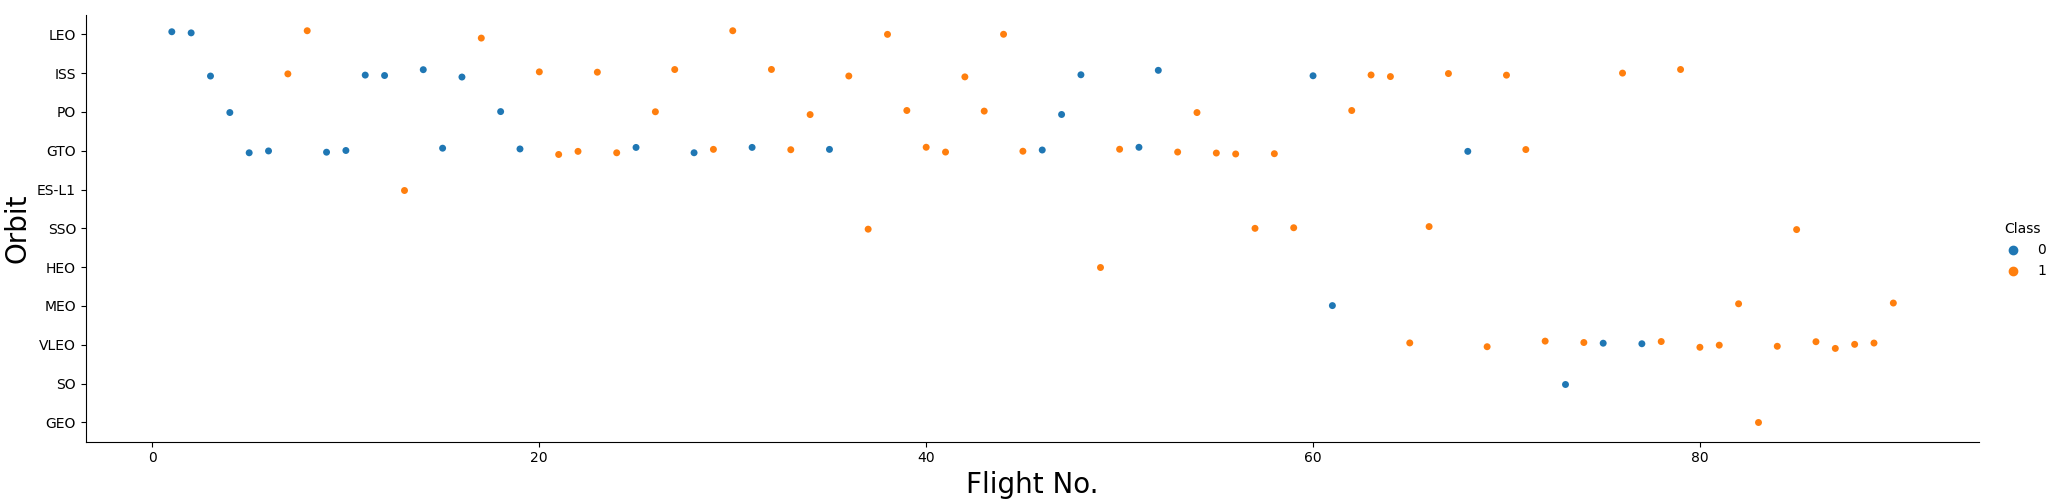

In [9]:
sns.catplot(x="FlightNumber", y="Orbit", hue="Class", data=df, aspect = 4)
plt.xlabel("Flight No.", fontsize=20)
plt.ylabel("Orbit", fontsize=20)
plt.show()

*In the LEO orbit, the Success appears related to the number of flights; when in GTO orbit, however, there seems to be no relationship between flight number.*

### Visualize the relationship between Payload and Orbit type


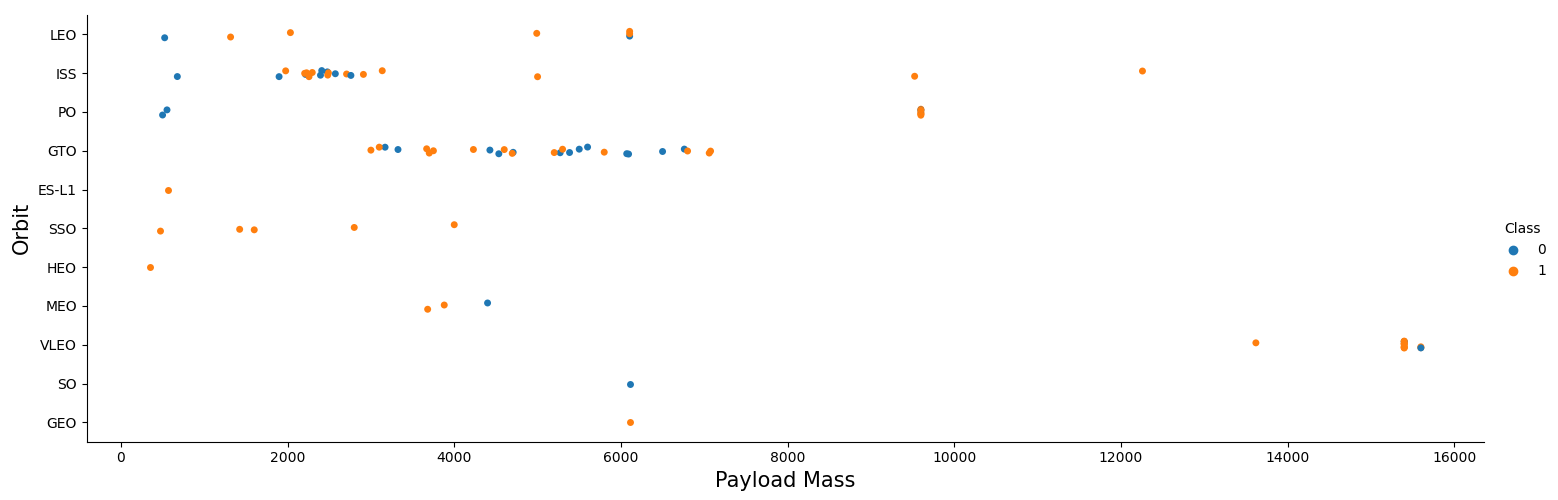

In [10]:
sns.catplot(x="PayloadMass", y="Orbit", hue="Class", data=df, aspect = 3)
plt.xlabel("Payload Mass", fontsize=15)
plt.ylabel("Orbit", fontsize=15)
plt.show()

*With heavy payloads the positive landing (successful) rate are more for Polar, LEO and ISS. However for GTO we cannot distinguish this well as both positive landing rate and negative landing (unsuccessful) are both there here.*


### Visualize the launch success yearly trend


In [11]:
# Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()
    

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [12]:
df_slr = df.groupby(['Date'])['Class'].mean().reset_index()
df_slr

,Date,Class
0,2010,0.000000
1,2012,0.000000
2,2013,0.000000
3,2014,0.333333
4,2015,0.333333
5,2016,0.625000
6,2017,0.833333
7,2018,0.611111
8,2019,0.900000
9,2020,0.842105


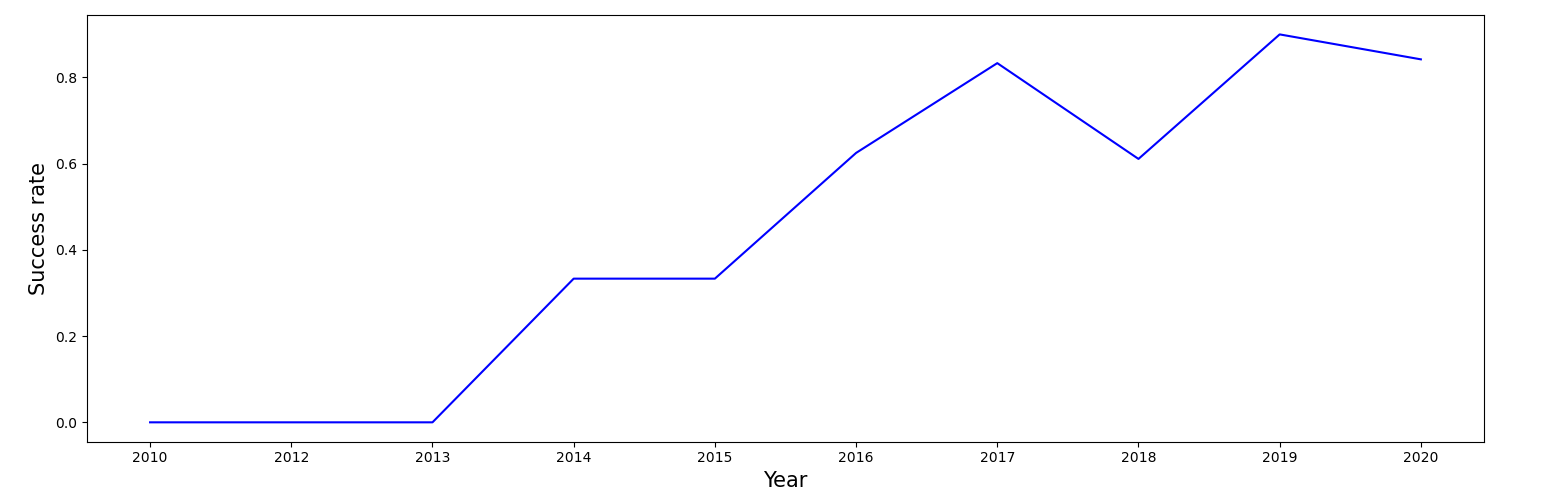

In [13]:
sns.lineplot(x='Date', y='Class', data=df_slr, color ='blue')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Success rate', fontsize=15)
plt.show()

Success rate since 2013 kept increasing till 2020


## Features Engineering


In [14]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### Create dummy variables to categorical columns


In [15]:
features_one_hot = pd.get_dummies(features, columns = ['Orbit', 'LaunchSite', 'Serial', 'LandingPad'])
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc
0,1,6104.959412,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Cast all numeric columns to `float64`


In [16]:
features_one_hot.astype('float').dtypes

FlightNumber                           float64
PayloadMass                            float64
Flights                                float64
GridFins                               float64
Reused                                 float64
                                        ...   
LandingPad_5e9e3032383ecb267a34e7c7    float64
LandingPad_5e9e3032383ecb554034e7c9    float64
LandingPad_5e9e3032383ecb6bb234e7ca    float64
LandingPad_5e9e3032383ecb761634e7cb    float64
LandingPad_5e9e3033383ecbb9e534e7cc    float64
Length: 80, dtype: object

##### Export it to a CSV

In [17]:
features_one_hot.to_csv('dataset_part\_3.csv', index=False)